# Segmentación de Figuras

- Color
    <img src='Colors.png' />
- Forma  
    <img src='form.png' />

## Importar  librerias 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image,ImageOps
import os
import math
import json
from io import StringIO
import skimage as ski
from skimage import data, io, filters

### Lectura de archivo de imágenes 

In [2]:
Blue=os.path.join("images/Azul.png")
Black=os.path.join("images/negro.png")
Red=os.path.join("images/Rojo.png")

In [3]:
Bl = Image.open(Blue)
Bk = Image.open(Black)
Rd = Image.open(Red)

## Analizamos los datos 

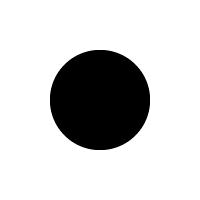

In [4]:
Bk

In [5]:
# Transformando a un arreglo 
np.array(Bk).shape

(200, 200, 4)

In [6]:
# Verificando los canales 
Bk.getbands()

('R', 'G', 'B', 'A')

In [7]:
# Removiendo el canal alpha 
ABk=np.array(Bk)[:,:,0:3]
ABl=np.array(Bl)[:,:,0:3]
ARd=np.array(Rd)[:,:,0:3]

In [8]:
# Verificando la forma
ABk.shape

(200, 200, 3)

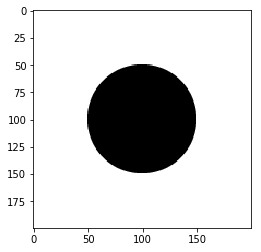

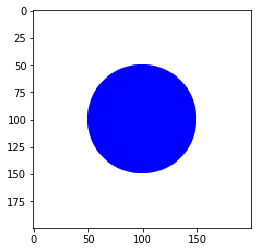

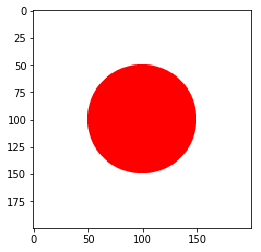

In [9]:
# Graficando las imágenes 
plt.imshow(ABk)
plt.show()
plt.imshow(ABl)
plt.show()
plt.imshow(ARd)
plt.show()

# Detectando el color por valor del pixel 
Extrayendo las características 

In [10]:
print(ABk[100,100])
print(ABl[100,100])
print(ARd[100,100])

[0 0 0]
[  0   0 255]
[255   0   0]


 **nota**: si los valores son tan distintivos no es necesario aplicar una red neuronal 

# Clasificador de color

In [11]:
#importar sklearn
from sklearn.neural_network import MLPClassifier

## Preparando los datos 

Para este primer caso usaremos aprendizaje supervisado 
Los datos de entrenamiento consisten en pares ordenados donde hay una lista de entradas y una lista de salidas 

### entradas
x=[[0,0,0],[1,0,0],[0,0,1]]

### Salidas 

(Necesario codificarlas) 
- negro=1,0,0
- rojo=0,1,0
- azul=0,0,1

y=[[1,0,0],[0,1,0],[0,0,1]]



In [12]:
def Lector_de_imagenes(Train_dir,jsonfile):
    Train_data=[]
    Tags=[]
    with open(jsonfile) as data_file:    
         etiquetas = json.load(data_file)
    for img in os.listdir(Train_dir):
        try : 
            imgtag=etiquetas[img]
            Tags.append(imgtag)
        except :
            print("Tag error: "+img)
        try : 
            imgpath=os.path.join(Train_dir,img)
            img = Image.open(imgpath)
            Train_data.append(np.array(img)[:,:,0:3][100,100]) 
        except :
            print("file error: "+img)
        #np.save(file+".npy",Train_data)
    return np.array(Train_data),Tags 

In [13]:
X_train,y_train=Lector_de_imagenes("images/colores/Train","Train_color.json")

Tag error: desktop.ini
file error: desktop.ini


In [14]:
X_test,y_test=Lector_de_imagenes("images/colores/Test","Test_color.json")

Tag error: desktop.ini
file error: desktop.ini


## Ajustar Parámetros del modelo

In [15]:
clfcolor = MLPClassifier(solver='lbfgs', alpha=1e-5,
                  hidden_layer_sizes=(10, 2), random_state=1)

## Ajuste del modelo

In [16]:
clfcolor.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [17]:
pred = clfcolor.predict(X_test)

## Evaluar al modelo 

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:
def ClassDetector(onehot):
    output=[]
    for caso in onehot:
        output.append(np.argmax(caso))
    return output

In [20]:
predclass=ClassDetector(pred)
yclass=ClassDetector(y_test)

In [21]:
print(accuracy_score(predclass,yclass)) 

0.888888888889


In [22]:
print(confusion_matrix(predclass,yclass))


[[2 0 0]
 [0 3 0]
 [1 0 3]]


## Clasificador de forma 
### Lectura de archivo de imágenes 

In [22]:
CR=os.path.join("images/circulo.png")
CD=os.path.join("images/cuadro.png")
TR=os.path.join("images/triangulo.png")

In [23]:
Cir = Image.open(CR).convert('L')
Cud = Image.open(CD).convert('L')
Tri = Image.open(TR).convert('L')

In [24]:
# Convertir a arreglo
ACR=np.array(Cir)
ACD=np.array(Cud)
ATR=np.array(Tri)

In [25]:
ACD.shape

(200, 200)

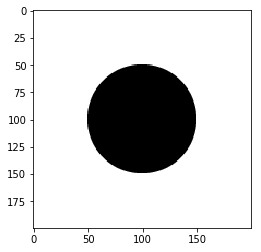

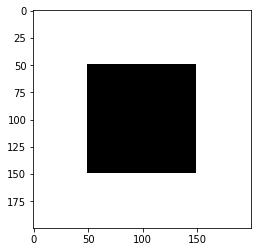

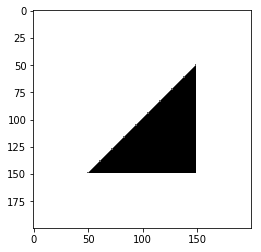

In [26]:
# Graficando las imágenes 
plt.imshow(ACR,cmap='gray')
plt.show()
plt.imshow(ACD,cmap='gray')
plt.show()
plt.imshow(ATR,cmap='gray')
plt.show()

## Determinando las características adecuadas 
¿Comó podemos  describir numéricamente la forma de las figuras?

### Usando el área de la figura como descriptor  

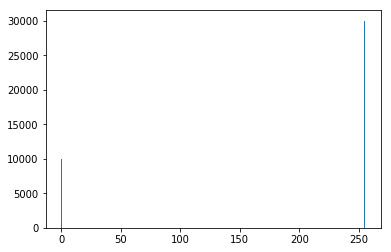

Área del cuadro en pixeles
10000


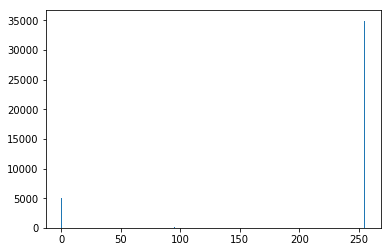

Área del Triángulo en pixeles
4950


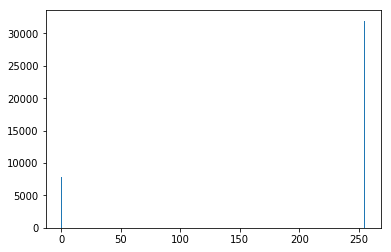

Área del círculo en pixeles
7772


In [27]:
# Posibles valores de intensidad en una imagen
x=np.arange(0,256)
# Cálculo del área del cuadrado 
hist,centers=ski.exposure.histogram(ACD)
plt.bar(x, hist)
plt.show()
print("Área del cuadro en pixeles")
# Cálculo del área del triángulo 
print(hist[0])
hist,centers=ski.exposure.histogram(ATR)
plt.bar(x, hist)
plt.show()
print("Área del Triángulo en pixeles")
# Cálculo del área del círculo 
print(hist[0])
hist,centers=ski.exposure.histogram(ACR)
plt.bar(x, hist)
plt.show()
print("Área del círculo en pixeles")
print(hist[0])

Ventajas  de usar el área como descriptor 
- Es invariante a la posición de la figura 

Limitantes de usar el área como descriptor 
- Es susceptible a los cambios en el tamaño  
- Es posible que el área de dos tipos de figuras diferentes se intersecten 

## Usando el número de  esquinas como descriptor 

In [28]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks

In [29]:
NCD=len(corner_peaks(corner_harris(ACD), min_distance=5))
NCR=len(corner_peaks(corner_harris(ACR), min_distance=5))
NTR=len(corner_peaks(corner_harris(ATR), min_distance=5))
print("Número de esquinas del cuadrado {}".format(NCD))
print("Número de esquinas del círculo {}".format(NCR))
print("Número de esquinas del triángulo  {}".format(NTR))

Número de esquinas del cuadrado 4
Número de esquinas del círculo 0
Número de esquinas del triángulo  3


Ventajas  de usar el área como descriptor 
- Es invariante a la posición de la figura 
- Es invariante a cambios en el tamaño

Limitantes de usar el área como descriptor 
- No permite diferenciar entre figuras con el mismo número de esquinas  cómo cuadrados y rectángulos
- El metodo de extraccion de caracteristicas falla en casos en donde las figuras tienen bordes irregulares como las figuras trazadas  a mano 

<img src='cuadroMT.png' width="40%" height="40%" />

In [31]:
#Contra Ejemplo
CDD=os.path.join("images/CuadroMT.png")
CadD = Image.open(CDD).convert('L')
ACDD=np.array(CadD)
len(corner_peaks(corner_harris(ACDD), min_distance=5))

12

### Usando un descriptor invariante 

El problema de identificación de formas se ha estudiado durante mucho tiempo, como resultado se han propuesto metodologías de extracción de características invariantes a rotación, traslación y escalamiento. Estas características son los momentos invariables de Hu.

Para mayor detalle favor de consultar el capítulo de extracción de características del libro Gonzalez & Woods, Digital Image Processing

http://www.sc.ehu.es/ccwgrrom/transparencias/pdf-vision-1-transparencias/capitulo-8.pdf

255


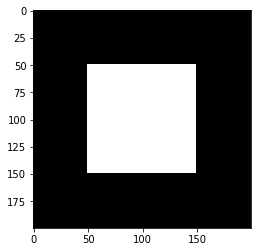

In [30]:
#  Proceso para aplicar los momentos de hu
# Invertir los colores de la imagen 
ICD=ski.util.invert(ACD)
print(ICD[100,100])
plt.imshow(ICD,cmap='gray')
plt.show()

In [31]:
def umbral_image(img):
    x,y=img.shape
    z=np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            if img[i,j]>25:
                z[i,j]=250
    return z

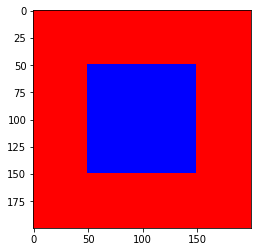

In [32]:
# Binarizar imagen 
CD=umbral_image(ICD)
label_image=ski.measure.label(ICD)
plt.imshow(ski.color.label2rgb(label_image))
plt.show()


In [33]:
# Calcular las propiedades de la figura
regions = ski.measure.regionprops(label_image)
for prop in regions[0]:
    print(prop, regions[0][prop])

area 10000
bbox (50, 50, 150, 150)
bbox_area 40000
centroid (99.5, 99.5)
convex_area 10000
convex_image [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]
coords [[ 50  50]
 [ 50  51]
 [ 50  52]
 ..., 
 [149 147]
 [149 148]
 [149 149]]
eccentricity 0.0
equivalent_diameter 112.83791670955127
euler_number 1
extent 1.0
filled_area 10000
filled_image [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]
image [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True

In [35]:
# Obtener la propiedad de interés
momento =regions[0].moments_hu

In [36]:
# Creando una función para extraer los momentos de hu 
def hu_Characteristics(img):
    Iing=ski.util.invert(img)
    Uing=umbral_image(Iing)
    label_image=ski.measure.label(Uing)
    regions = ski.measure.regionprops(label_image)
    momento =regions[0].moments_hu
    return momento

In [37]:
print("Momentos del cuadrado {}".format(hu_Characteristics(ACD)))
print("Momentos del círculo {}".format(hu_Characteristics(ACR)))
print("Momentos del triángulo   {}".format(hu_Characteristics(ATR)))

Momentos del cuadrado [ 0.16665  0.       0.       0.       0.       0.       0.     ]
Momentos del círculo [ 0.15915634  0.          0.          0.          0.          0.          0.        ]
Momentos del triángulo   [  2.22178218e-01   1.23407901e-02   5.48493137e-03   2.19397255e-04
  -2.40675777e-07  -2.43726455e-05   0.00000000e+00]


## Preparando los datos

Para este primer caso usaremos aprendizaje supervisado,los datos de entrenamiento consisten en pares ordenados donde hay una lista de entradas y una lista de salidas 

### entradas
x=[[0,0,0],[1,0,0],[0,0,1]]

### Salidas 

(Necesario codificarlas) 
- Cuadro=1,0,0
- Triángulo=0,1,0
- Círculo=0,0,1

y=[[1,0,0],[0,1,0],[0,0,1]]

In [38]:
def Lector_forma(Train_dir,jsonfile):
    Train_data=[]
    Tags=[]
    with open(jsonfile) as data_file:    
         etiquetas = json.load(data_file)
    for img in os.listdir(Train_dir):
        try : 
            imgtag=etiquetas[img]
            Tags.append(imgtag)
        except :
            print("Tag error: "+img)
        try : 
            imgpath=os.path.join(Train_dir,img)
            img = Image.open(imgpath).convert('L')
            Train_data.append(hu_Characteristics(np.array(img))) 
        except :
            print("file error: "+img)
        #np.save(file+".npy",Train_data)
    return np.array(Train_data),Tags 

In [39]:
X_train,y_train=Lector_forma("images/Forma/Train","Train_forma.json")

Tag error: desktop.ini
file error: desktop.ini


In [40]:
X_test,y_test=Lector_forma("images/Forma/Test","Test_forma.json")

Tag error: desktop.ini
file error: desktop.ini


In [41]:
X_train

array([[  2.59405326e-01,   3.09133916e-02,   6.13880006e-03,
          3.98169636e-04,  -5.95128918e-07,  -6.77211927e-05,
         -1.82581552e-07],
       [  2.02886444e-01,   4.33109840e-03,   4.77973530e-03,
          1.47320455e-04,   1.19870140e-07,   9.04763748e-06,
          3.02258185e-08],
       [  1.59366113e-01,   4.77391911e-05,   1.36626160e-06,
          7.57461269e-10,  -6.81607750e-18,  -1.97952382e-12,
          2.33945903e-17],
       [  1.66992927e-01,   1.15299553e-04,   1.27414482e-06,
          1.36229222e-07,  -1.17281659e-14,  -9.08658047e-10,
          5.55314203e-14],
       [  1.59224005e-01,   1.36928614e-05,   4.99543230e-07,
          1.22885873e-10,   1.03370550e-19,   1.23144880e-13,
         -9.57242327e-19],
       [  1.66719514e-01,   1.39508895e-05,   1.05831946e-06,
          1.17762518e-07,  -2.37733945e-14,   2.04361853e-10,
         -3.41057319e-14],
       [  2.35472899e-01,   1.87009844e-02,   5.79205220e-03,
          4.93419547e-04,   4.25

## Ajustar Parámetros del modelo

In [42]:
clforma = MLPClassifier(solver='lbfgs', alpha=1e-2,
                  hidden_layer_sizes=(10, 3), random_state=1)

## Ajuste del modelo

In [43]:
clforma.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [44]:
pred = clforma.predict(X_test)

## Evaluar al modelo 

In [45]:
predclass=ClassDetector(pred)
yclass=ClassDetector(y_test)
print(predclass)
print(yclass)

[1, 0, 0, 1, 0, 0]
[1, 2, 0, 1, 2, 0]


In [46]:
print(accuracy_score(predclass,yclass)) 

0.666666666667


In [47]:
print(confusion_matrix(predclass,yclass))

[[2 0 2]
 [0 2 0]
 [0 0 0]]


# Implementar el modelo

In [55]:
from sklearn.externals import joblib

In [56]:
filename = 'clforma_model.sav'
joblib.dump(clforma, filename)

['clforma_model.sav']

In [57]:
loaded_model = joblib.load(filename)


In [61]:
load_predict=loaded_model.predict(X_test)

In [62]:
ClassDetector(load_predict)

[0, 0, 1, 1, 0, 0]